In [221]:
import pandas as pd
import matplotlib.pyplot as plt
# import seab as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [222]:
df = pd.read_csv('vgsales_cleaned.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Laris
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,1
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,1
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1


In [223]:
df.shape

(16291, 12)

In [224]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
Laris           0
dtype: int64

In [225]:
from sklearn.impute import SimpleImputer 

In [226]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols= df.select_dtypes(include=['object']).columns

In [227]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

In [228]:
df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [229]:
df.shape

(16291, 12)

In [230]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
Laris           0
dtype: int64

In [231]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Laris
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910,0.124670
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345,0.330355
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,0.000000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,0.000000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000,0.000000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000,1.000000


Memprediksi apakah sebuah game akan laris atau tidak laris di tahun 2026. teknik data mining : Klasifikasi (KNN)

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2886
           1       0.39      0.19      0.25       380

    accuracy                           0.87      3266
   macro avg       0.65      0.57      0.59      3266
weighted avg       0.84      0.87      0.85      3266



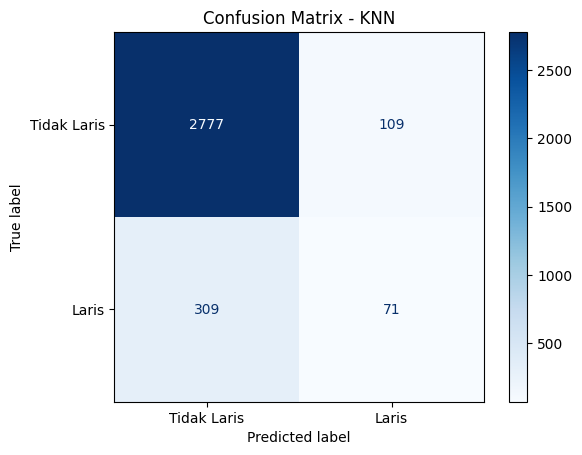

C:\Users\harid\AppData\Local\Temp\ipykernel_14056\2219223469.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette='pastel')


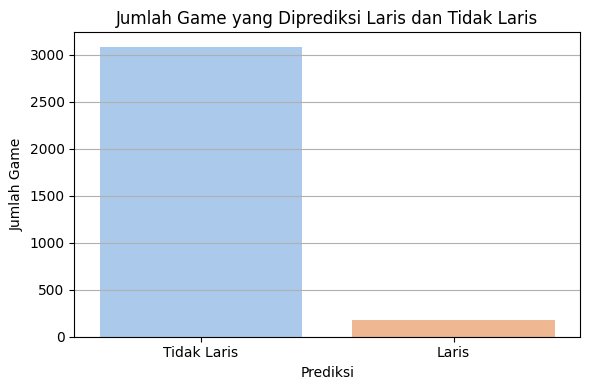

In [ ]:
df = pd.read_csv("vgsales.csv")

df['Laris'] = (df['Global_Sales'] > 1.0).astype(int)
df = df[df['Year'].notnull()]
df_train = df[df['Year'] < 2026]

X = df_train[['Platform', 'Year', 'Genre', 'Publisher']].copy()
y = df_train['Laris']

encoders = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Tidak Laris", "Laris"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.grid(False)
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=y_pred, palette='pastel')
plt.xticks([0, 1], ['Tidak Laris', 'Laris'])
plt.title("Jumlah Game yang Diprediksi Laris dan Tidak Laris")
plt.xlabel("Prediksi")
plt.ylabel("Jumlah Game")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [233]:
# Simpan dataset bersih ke file CSV baru
df_clean = df.dropna()  # jika kamu belum membersihkannya, pastikan ini dilakukan
df_clean.to_csv("vgsales_cleaned.csv", index=False)

<Figure size 1200x600 with 0 Axes>

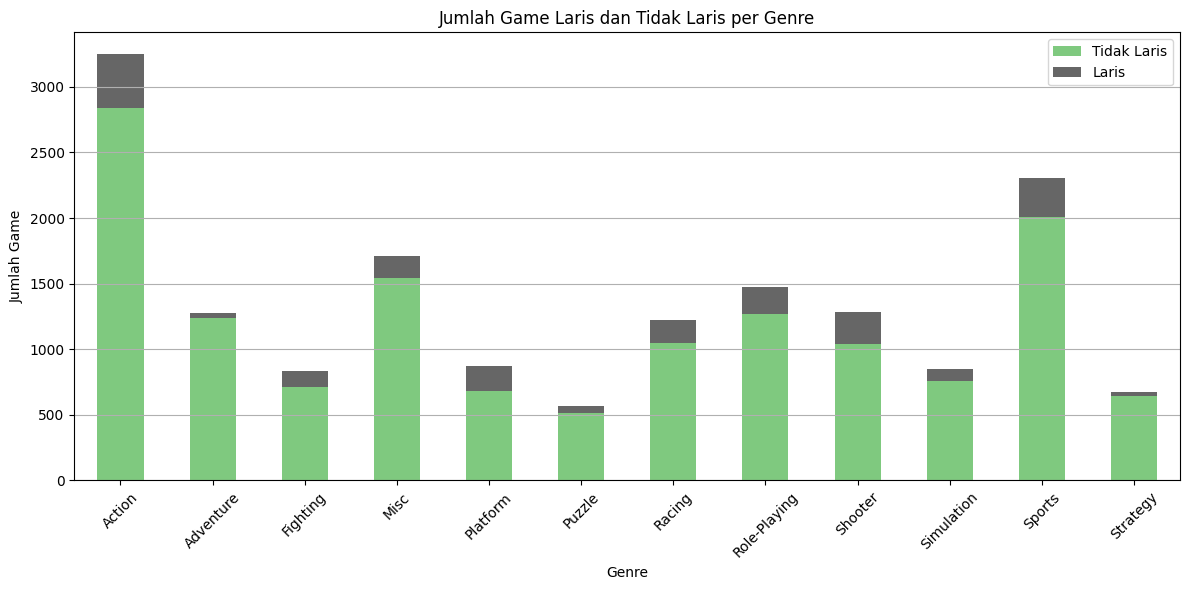

In [234]:
# Tambahkan kolom 'Laris' (1 jika Global_Sales > 1 juta, 0 jika tidak)
df['Laris'] = (df['Global_Sales'] > 1.0).astype(int)

# Hitung jumlah game laris dan tidak laris untuk setiap genre
genre_laris_counts = df.groupby(['Genre', 'Laris']).size().unstack(fill_value=0)

# Buat grafik bar tumpuk (stacked bar)
plt.figure(figsize=(12, 6))
genre_laris_counts.plot(kind='bar', stacked=True, colormap='Accent', figsize=(12, 6))
plt.title('Jumlah Game Laris dan Tidak Laris per Genre')
plt.xlabel('Genre')
plt.ylabel('Jumlah Game')
plt.xticks(rotation=45)
plt.legend(['Tidak Laris', 'Laris'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

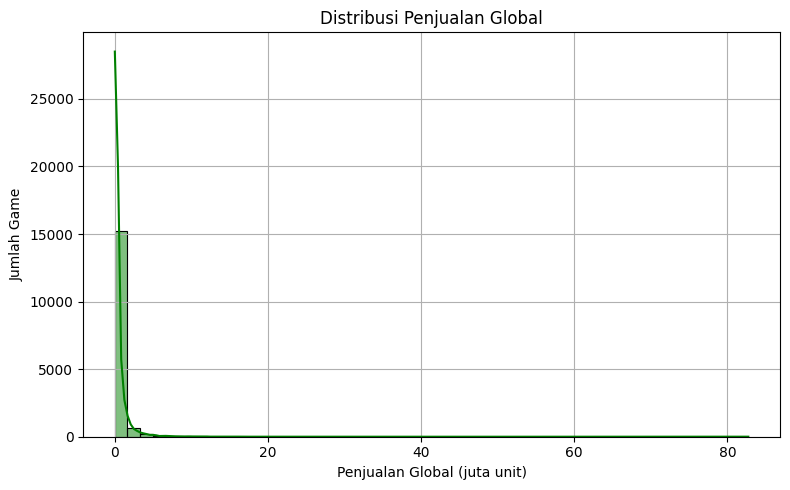

In [235]:
# Tambah kolom 'Laris' jika Global_Sales > 1 juta
df['Laris'] = (df['Global_Sales'] > 1.0).astype(int)

# ------------------ Distribusi Penjualan Global ------------------
plt.figure(figsize=(8, 5))
sns.histplot(df['Global_Sales'], bins=50, kde=True, color='green')
plt.title('Distribusi Penjualan Global')
plt.xlabel('Penjualan Global (juta unit)')
plt.ylabel('Jumlah Game')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\harid\AppData\Local\Temp\ipykernel_14056\2581415107.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Genre', order=df['Genre'].value_counts().index, palette='pastel')


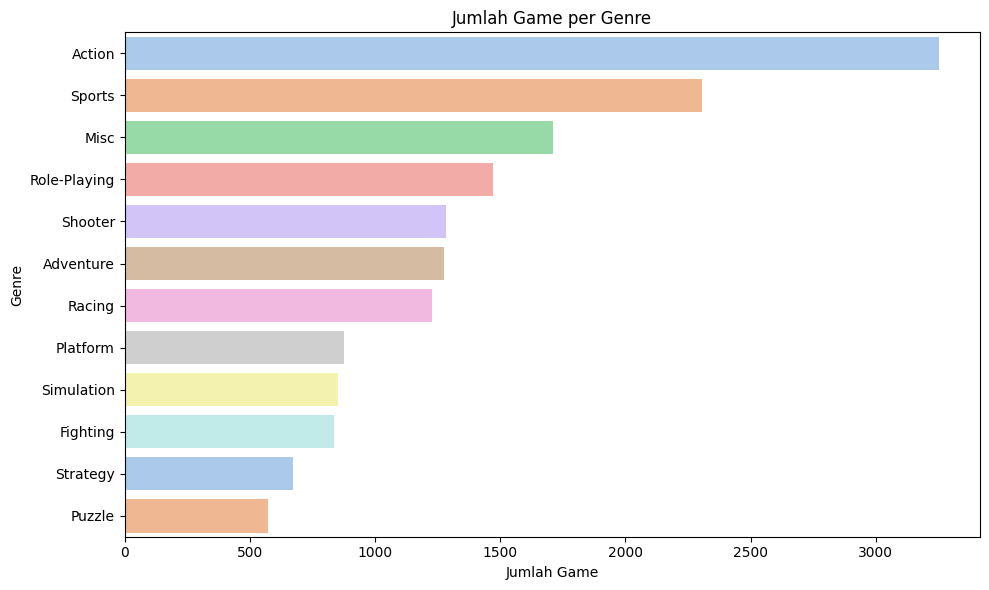

In [236]:
# ------------------ Genre Terpopuler ------------------
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Genre', order=df['Genre'].value_counts().index, palette='pastel')
plt.title('Jumlah Game per Genre')
plt.xlabel('Jumlah Game')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

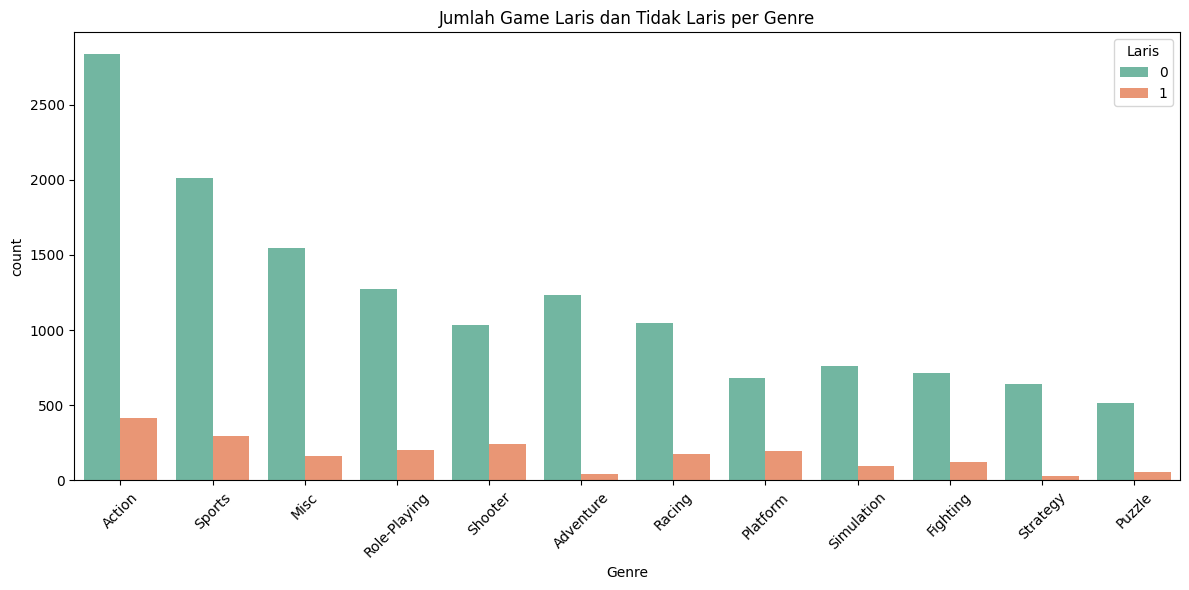

In [237]:
# ------------------ Genre vs Laris ------------------
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Genre', hue='Laris', order=df['Genre'].value_counts().index, palette='Set2')
plt.title('Jumlah Game Laris dan Tidak Laris per Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\harid\AppData\Local\Temp\ipykernel_14056\3962241795.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Platform'].isin(top_platforms)], y='Platform', order=top_platforms, palette='coolwarm')


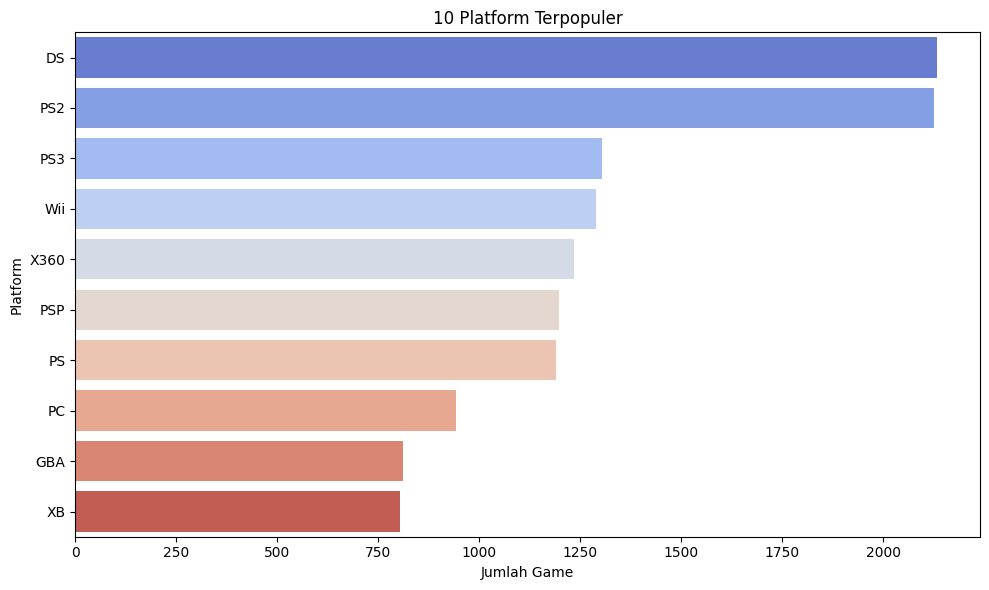

In [238]:
# ------------------ Platform Terpopuler ------------------
top_platforms = df['Platform'].value_counts().nlargest(10).index
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['Platform'].isin(top_platforms)], y='Platform', order=top_platforms, palette='coolwarm')
plt.title('10 Platform Terpopuler')
plt.xlabel('Jumlah Game')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

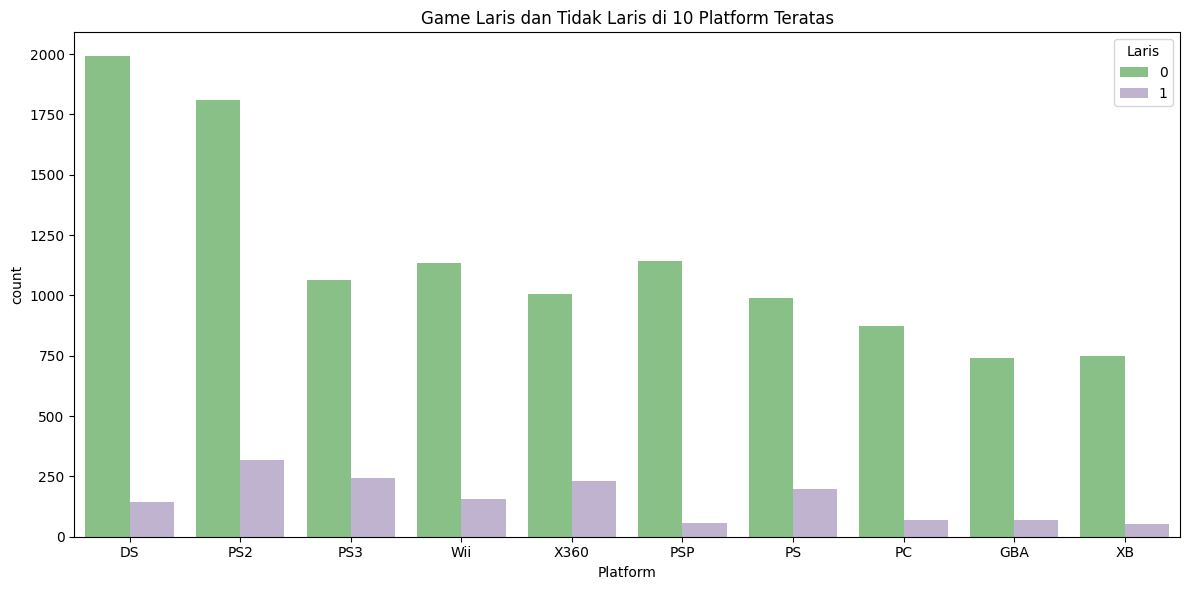

In [239]:
# ------------------ Platform vs Laris ------------------
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['Platform'].isin(top_platforms)], x='Platform', hue='Laris', order=top_platforms, palette='Accent')
plt.title('Game Laris dan Tidak Laris di 10 Platform Teratas')
plt.tight_layout()
plt.show()

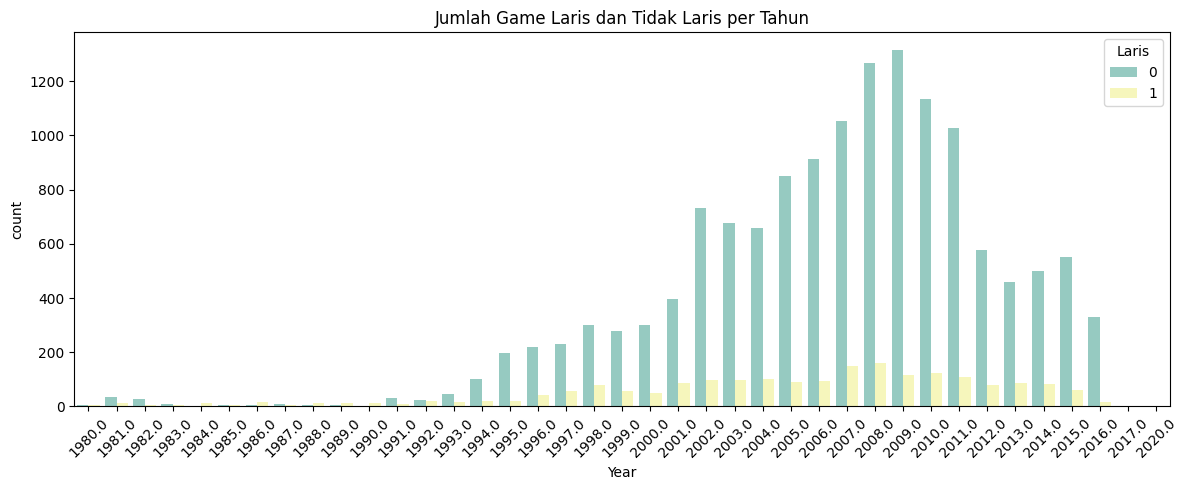

In [240]:
# ------------------ Tren Tahun Rilis ------------------
plt.figure(figsize=(12, 5))
sns.countplot(data=df[df['Year'].notnull()], x='Year', hue='Laris', palette='Set3')
plt.title('Jumlah Game Laris dan Tidak Laris per Tahun')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

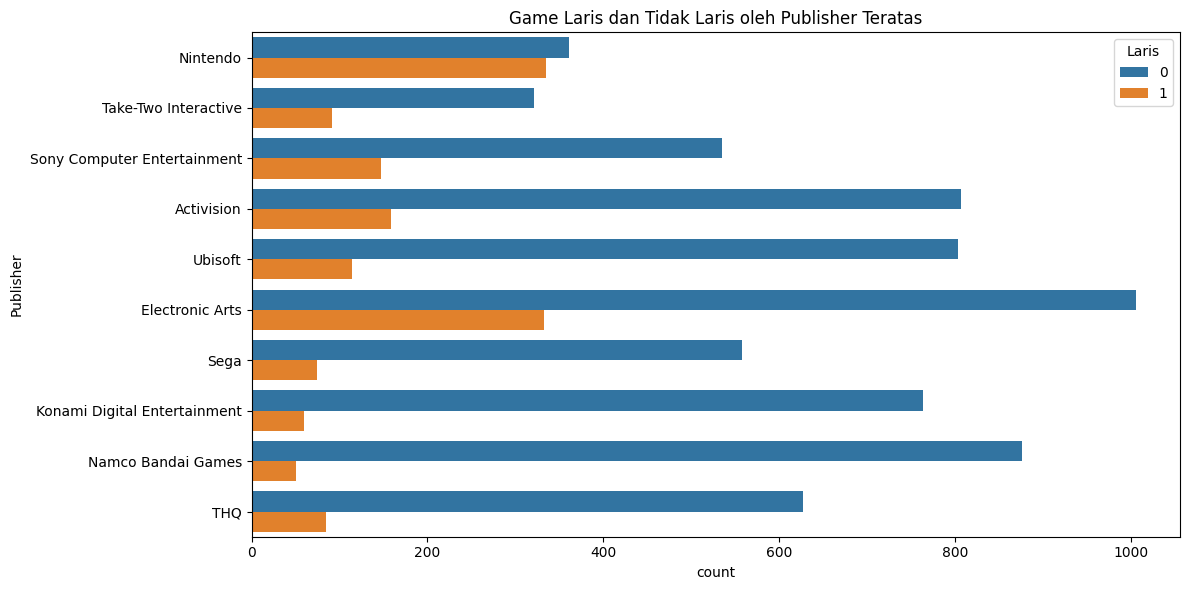

In [241]:
# ------------------ Publisher Teratas dan Laris ------------------
top_publishers = df['Publisher'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['Publisher'].isin(top_publishers)], y='Publisher', hue='Laris', palette='tab10')
plt.title('Game Laris dan Tidak Laris oleh Publisher Teratas')
plt.tight_layout()
plt.show()

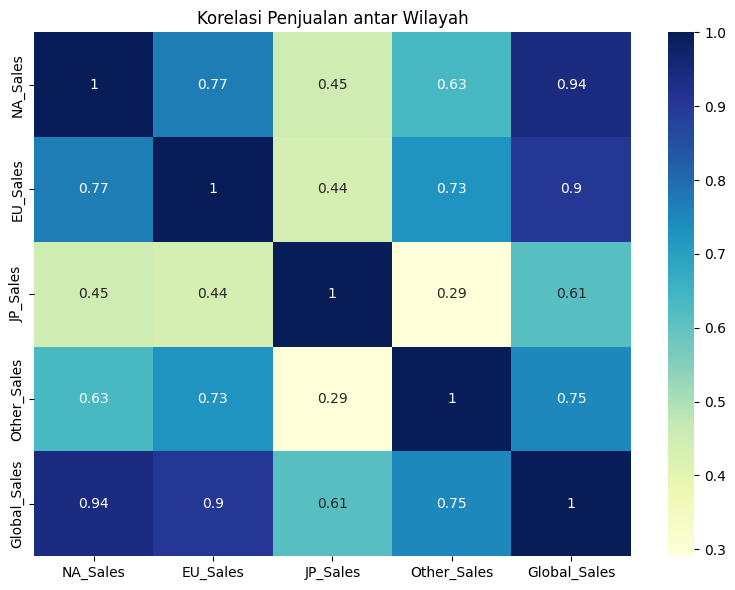

In [242]:
# ------------------ Korelasi Penjualan Wilayah ------------------
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
plt.figure(figsize=(8, 6))
sns.heatmap(df[sales_cols].corr(), annot=True, cmap='YlGnBu')
plt.title('Korelasi Penjualan antar Wilayah')
plt.tight_layout()
plt.show()


In [ ]:
# Load file hasil imputasi
df = pd.read_csv("vgsales_cleaned.csv")

# Tambahkan label Laris
df['Laris'] = (df['Global_Sales'] > 1.0).astype(int)

# Total data
total_games = len(df)

# Rasio Laris vs Tidak Laris
laris = df['Laris'].sum()
tidak_laris = total_games - laris
print(f"Game Laris: {laris} ({laris / total_games:.2%})")
print(f"Game Tidak Laris: {tidak_laris} ({tidak_laris / total_games:.2%})")

# Genre terbanyak
print("\nGenre Terbanyak:")
print(df['Genre'].value_counts().head(2))

# Platform terbanyak
print("\nPlatform Terbanyak:")
print(df['Platform'].value_counts().head(3))

# Game antara tahun 2006-2010
print("\nJumlah Game (2006-2010):")
print(df[df['Year'].between(2006, 2010)].shape[0])

# Publisher terbanyak untuk game laris
print("\nPublisher Terbanyak (Game Laris):")
print(df[df['Laris'] == 1]['Publisher'].value_counts().head(2))

# Korelasi dengan Global Sales
print("\nKorelasi dengan Global_Sales:")
print(df[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].corr()['Global_Sales'].drop('Global_Sales'))


Game Laris: 2031 (12.47%)
Game Tidak Laris: 14260 (87.53%)

Genre Terbanyak:
Genre
Action    3251
Sports    2304
Name: count, dtype: int64

Platform Terbanyak:
Platform
DS     2131
PS2    2127
PS3    1304
Name: count, dtype: int64

Jumlah Game (2006–2010):
6325

Publisher Terbanyak (Game Laris):
Publisher
Nintendo           335
Electronic Arts    333
Name: count, dtype: int64

Korelasi dengan Global_Sales:
NA_Sales       0.941269
EU_Sales       0.903264
JP_Sales       0.612774
Other_Sales    0.747964
Name: Global_Sales, dtype: float64


In [244]:
import numpy as np
import pandas as pd

# Contoh y_pred = hasil prediksi model KNN
# Misalnya: y_pred = model.predict(X_test)

# Buat DataFrame prediksi
pred_df = pd.DataFrame(y_pred, columns=["Prediksi"])

# Hitung jumlah masing-masing kelas
pred_counts = pred_df["Prediksi"].value_counts()
print("Jumlah Prediksi:")
print("Tidak Laris (0):", pred_counts[0])
print("Laris (1):", pred_counts[1])


Jumlah Prediksi:
Tidak Laris (0): 3086
Laris (1): 180
